<img style="margin-top: 0px" src=" 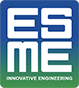" align="left" alt="logo esme"  height="20"> 
<div class="alert alert-block alert-info" style="margin-top: 10px; padding: 10px; background: linear-gradient(to right, #f7f9fa, #d9edfb);">
    <h1 style="margin-left: 85px">Advanced Algorithmics 1 - Course 03 - Sorting algorithms 2</h1>
</div>

<div style='color: rgb(49, 112, 143)'>
    <h3>Contents</h3>
</div>

* <a href="#Merge-sorting">Merge sorting</a>
    * <a href="#Definition">Definition</a>
    * <a href="#Implementation">Implementation</a>
    * <a href="#Complexity">Complexity</a>
* <a href="#Counting-sort">Counting sort</a>
    * <a href="#Definition">Definition</a>
    * <a href="#Example-of-use">Example of use</a>
    * <a href="#Counting-sort-implementation">Counting sort implementation</a>
    * <a href="#Algorithmic-complexity-of-count-sorting">Algorithmic complexity of count sorting</a>

<div class="alert alert-block alert-info" style='color:white; background-color:blue; border-color: blue; '>
    <h2>Merge sorting</h2>
</div>

<div style='color: forestgreen'>
    <h3>Definition</h3>
</div>

This sort was invented by John von Neumann in 1945. It uses the "divide and conquer" principle.

The algorithm is simply described in a recursive manner as follows:

- If the list has 0 or 1 elements, it is already sorted.
- If the list has more than one element, we split it into two lists and apply the merge sort to each of the two lists.
- The results are merged.

To merge two sorted lists, we compare the elements in each of the two lists and move the smaller one to a new list. When one of the two lists is empty, we move the remaining elements to the second list.

Example:

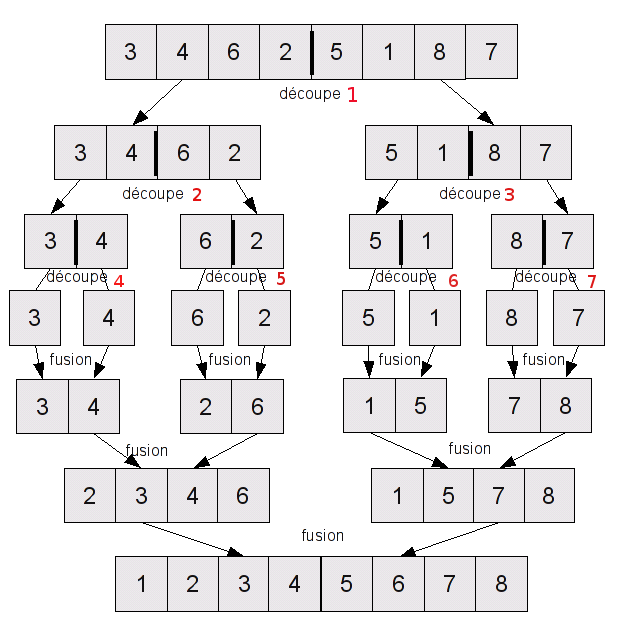

<div style='color: forestgreen'>
    <h3>Implementation</h3>
</div>

We've chosen to treat the merge iteratively, filling an initially empty list $liste$ with the elements of the two lists $liste1$ and $liste2$.

In [3]:
def merge(liste1, liste2):
    liste = []
    i, j = 0, 0
    while i < len(liste1) and j < len(liste2):
        if liste1[i] < liste2[j]:
            liste.append(liste1[i])
            i += 1
        else:
            liste.append(liste2[j])
            j += 1
    while i<len(liste1):
        liste.append(liste1[i])
        i+=1
    while j<len(liste2):
        liste.append(liste2[j])
        j+=1
    return liste
            

All that's left to do is write the code for the `merge_sort` function (if n >= 2, set $L1 = L[0:p]$ (the list breakdown from index 0 to index p-1) and $L2 = L[p:]$ (the list breakdown from index p to the last index).

<div style="border-color: rgba(40, 167, 70, 0.294); margin: 1.5625em auto; padding: 0 .6rem .8rem !important; overflow: hidden; page-break-inside: avoid; border-left: .2rem solid rgba(40, 167, 70, 0.294); border-radius: .1rem; box-shadow: 0 .2rem .5rem rgba(0,0,0,.05),0 0 .05rem rgba(0,0,0,.1); transition: color .25s,background-color .25s,border-color .25s;">
    <p style="background-color: rgba(40,167,70,0.1); position: relative; margin: 0 -.6rem !important; padding: .4rem .6rem .4rem 2rem; font-weight: 700;">💡 Information</p>
<p style="padding: 0 1.4rem; margin-top: .4em; margin-bottom: 0; font-size: 1em;">
Slicing in Python is a feature that extracts a subsequence from a sequence (for example, a sublist from a list). This can be very useful for accessing specific parts of a sequence. Slicing uses three parameters:
    
   <code style="margin: 0 1.4rem;">sequence[start:end:frequency]</code>
   
   
- The first parameter is the start index, which is **included** in the subsequence.
- The second parameter is the end index, which is **excluded** from the subsequence.
- The third parameter, frequency, is optional. It indicates the frequency at which elements are to be extracted from the sequence.

</p>
</div>

In [5]:
def merge_sort(liste):
    if len(liste)<2:
        return liste[:]
    else:
        milieu=len(liste)//2
        liste1=merge_sort(liste[:milieu])
        liste2=merge_sort(liste[milieu:])
        return merge(liste1,liste2)

L=[3,4,6,2,5,1,8,7]
print(merge_sort(L))

[1, 2, 3, 4, 5, 6, 7, 8]


<div style='color: forestgreen'>
    <h3>Complexity</h3>
</div>

The time complexity of this algorithm is $O(n\log{}n)$ in the best case, in the worst case and therefore also on average (in the average case).


<div class="alert alert-block alert-info" style='color:white; background-color:blue; border-color: blue; '>
    <h2>Counting sort</h2>
</div>

<div style='color: forestgreen'>
    <h3>Definition</h3>
</div>

Counting sort is also known as **crate sort**.

This sort is only applicable when the list to be sorted is made up **of integer values between two known bounds**. This constraint greatly reduces its scope of application.

<div style="border-color: #007bff; margin: 1.5625em auto; padding: 0 .6rem .8rem !important; overflow: hidden; page-break-inside: avoid;border-left: .2rem solid #007bff; border-radius: .1rem; box-shadow: 0 .2rem .5rem rgba(0,0,0,.05),0 0 .05rem rgba(0,0,0,.1); transition: color .25s,background-color .25s,border-color .25s;">
    <p style="background-color: #e7f2fa; position: relative; margin: 0 -.6rem !important; padding: .4rem .6rem .4rem 2rem; font-weight: 700;">📝 Note</p>
    <p style="padding: 0 1.4rem; margin-top: .4em; margin-bottom: 0; font-size: 1em;">
   
However, when it's used, it's extremely efficient. This is because it's the only sort that doesn't **require any comparison between the different elements of the list to be sorted**.
   </p>
</div>

The principle is based on constructing a histogram of the data, then scanning it in ascending order to reconstruct the sorted data.

Let's assume in the following that we only have positive integer values.
The principle of sorting by counting is as follows:

- Find the largest element v in the set of elements.
- Construct an array of size v+1 with indices from 0 to v and initialize the values in this array to 0.
- Browse the set of values to be sorted, and for each value x, increment the x-index cell.
- Browse the array and construct the set of sorted elements, creating as many index values for each array cell as its contents indicate.

<div style='color: forestgreen'>
    <h3>Example of use</h3>
</div>

If I have a list L of several notes between 0 and 10 to sort in ascending order, sorting by count will certainly be the best sort to use.

The principle is simple:

- <u>Step 1</u>: Histogram calculation <br>
 - First, we create a **histogram** list of 11 zeros, which we'll use for counting. <br>
 - We **scroll** through the list L to be sorted and take the first element i of our list L. We then add 1 to index i of our histogram list, which we'll use to **count**. <br>
 - Repeat for **all elements of the list**.

- <u>Step 2</u>: Deduce the sorted list from the histogram <br>
 - At the end, we **scroll through all the elements of the histogram list to create our sorted list L_sorted**. <br>
 - Each time there is a non-zero value in the histogram list: we add the value of the index of this histogram list to our L_sorted and add it as many times as the value of this cell.

<table>
  <tr>
    <td style="background-color: Azure">L = [ </td>
    <td style="background-color: Azure">3 , </td>
    <td style="background-color: Azure">6 , </td>
    <td style="background-color: Azure">8 , </td>
    <td style="background-color: Azure">2 , </td>
    <td style="background-color: Azure">8 , </td>
    <td style="background-color: Azure">3 , </td>
    <td style="background-color: Azure">1 , </td>
    <td style="background-color: Azure">8 , </td>
    <td style="background-color: Azure">10 , </td>
    <td style="background-color: Azure">7 , </td>
    <td style="background-color: Azure">4 , </td>
    <td style="background-color: Azure">5 , </td>
    <td style="background-color: Azure">9 , </td>
    <td style="background-color: Azure">0 , </td>
    <td style="background-color: Azure">8 , </td>
    <td style="background-color: Azure">7 , </td>
    <td style="background-color: Azure">4 , </td>
    <td style="background-color: Azure">6 , </td>
    <td style="background-color: Azure">8 , </td>
    <td style="background-color: Azure">7 ]</td>
  </tr>
</table>

<table border>
  <tr align="center">
      <td >  </td>
          <td> </td>
    <th style="background-color: LightCyan">hist[0]  </th>
    <td> </td>
    <th style="background-color: LightCyan">hist[1]  </th>
    <td> </td>
    <th style="background-color: LightCyan">hist[2]  </th>
    <td> </td>
    <th style="background-color: LightCyan">hist[3]  </th>
    <td> </td>
    <th style="background-color: LightCyan">hist[4]  </th>
    <td> </td>
    <th style="background-color: LightCyan">hist[5]  </th>
    <td> </td>
    <th style="background-color: LightCyan">hist[6]  </th>
    <td> </td>
    <th style="background-color: LightCyan">hist[7]  </th>
    <td> </td>
    <th style="background-color: LightCyan">hist[8]  </th>
    <td> </td>
    <th style="background-color: LightCyan">hist[9]  </th>
    <td> </td>
    <th style="background-color: LightCyan">hist[10]  </th>
  </tr>
  <tr align="center">
            <td >  </td>
          <td> </td>
    <td  align="center" style="background-color: LightCyan">1</td>
    <td> </td>
      <td  align="center"  style="background-color: LightCyan">1</td>
    <td> </td>
      <td  align="center"  style="background-color: LightCyan">1</td>
    <td> </td>
      <td  align="center"  style="background-color: LightCyan">2</td>
    <td> </td>
      <td  align="center"  style="background-color: LightCyan">2</td>
    <td> </td>
      <td  align="center"  style="background-color: LightCyan">1</td>
    <td> </td>
      <td  align="center"  style="background-color: LightCyan">2</td>
    <td> </td>
      <td align="center" style="background-color: LightCyan">3</td>
    <td> </td>
      <td  align="center"  style="background-color: LightCyan">5</td>
    <td> </td>
      <td  align="center"  style="background-color: LightCyan">1</td>
    <td> </td>
      <td  align="center"  style="background-color: LightCyan">1</td>
  </tr>
      <tr>
             <td> </td>
             <td> </td>
             <td> </td>
             <td> </td>
             <td> </td>
             <td> </td>
             <td> </td>
             <td> </td>
             <td> </td>
                       <td> </td>
             <td> </td>
             <td> </td>
             <td> </td>
             <td> </td>
             <td> </td>
             <td> </td>
             <td> </td>
             <td> </td>
                 <td> </td>
             <td> </td>
                       <td> </td>
             <td> </td>
        </tr>
  <tr align="center">
          <td class="text-center" style="background-color: LightCyan">L_sorted= </td>
    <td> </td>
    <td class="text-center" style="background-color: LightCyan">0</td>
    <td> </td>
      <td class="text-center" style="background-color: LightCyan">1</td>
    <td> </td>
      <td class="text-center" style="background-color: LightCyan">2</td>
    <td> </td>
      <td class="text-center" style="background-color: LightCyan">3 , 3</td>
    <td> </td>
      <td class="text-center" style="background-color: LightCyan">4 , 4</td>
    <td> </td>
      <td class="text-center" style="background-color: LightCyan">5</td>
    <td> </td>
      <td class="text-center" style="background-color: LightCyan">6 , 6</td>
    <td> </td>
      <td text-align= "center"; style="background-color: LightCyan">7 , 7 , 7</td>
    <td> </td>
      <td class="text-center" style="background-color: LightCyan">8 , 8 , 8 , 8 , 8</td>
    <td> </td>
      <td class="text-center" style="background-color: LightCyan">9</td>
    <td> </td>
      <td class="text-center" style="background-color: LightCyan">10</td>
  </tr>
</table>

<table>
  <tr>
    <td  style="background-color: Azure">L_sorted= [ </td>
    <td style="background-color: Azure">0 , </td>
    <td style="background-color: Azure">1 , </td>
    <td style="background-color: Azure">2 , </td>
    <td style="background-color: Azure">3 , </td>
    <td style="background-color: Azure">3 , </td>
    <td style="background-color: Azure">4 , </td>
    <td style="background-color: Azure">4 , </td>
    <td style="background-color: Azure">5 , </td>
    <td style="background-color: Azure">6 , </td>
    <td style="background-color: Azure">6 , </td>
    <td style="background-color: Azure">7 , </td>
    <td style="background-color: Azure">7 , </td>
    <td style="background-color: Azure">7 , </td>
    <td style="background-color: Azure">8 , </td>
    <td style="background-color: Azure">8 , </td>
    <td style="background-color: Azure">8 , </td>
    <td style="background-color: Azure">8 , </td>
    <td style="background-color: Azure">8 , </td>
    <td style="background-color: Azure">9 , </td>
    <td style="background-color: Azure">10 ]</td>
  </tr>
</table>

<div style='color: forestgreen'>
    <h3>Counting sort implementation</h3>
</div>

The pseudo-code sort-count algorithm for sorting a list L is given as follows:

    k=max(L)
    count = array of k+1 zeros 
    For each x de L : 
        count[x] += 1 

    T=[]
    For each i from 0 to k+1 :
        For each j from 0 to count[i]:
            T+=[i]

<div style='color: forestgreen'>
    <h3>Algorithmic complexity of count sorting</h3>
</div>

To calculate the complexity of this sort, let's consider a set of n elements. 

- First, we scan the list once to find the largest element v. This is a complexity in $O(n)$.


- Next, we construct an array with $m=v+1$ elements and initialize this array to 0. Complexity in $O(m)$. The memory space allocated to create such an array is also proportional to $m$.


- Next, the set of elements is traversed by incrementing the corresponding cell in the array, giving a complexity of $O(n)$.


- Finally, we traverse the various cells of the array and reconstruct the set of elements by classifying them, giving us a complexity of $O(m)$.

In the end, the complexity in terms of number of operations is $O(m+n)$. We can see that the complexity is linear, but it also depends on the value interval m of the integers to be sorted. The smaller the value interval, the more efficient the sorting.

<div style="border-color: #007bff; margin: 1.5625em auto; padding: 0 .6rem .8rem !important; overflow: hidden; page-break-inside: avoid;border-left: .2rem solid #007bff; border-radius: .1rem; box-shadow: 0 .2rem .5rem rgba(0,0,0,.05),0 0 .05rem rgba(0,0,0,.1); transition: color .25s,background-color .25s,border-color .25s;">
    <p style="background-color: #e7f2fa; position: relative; margin: 0 -.6rem !important; padding: .4rem .6rem .4rem 2rem; font-weight: 700;">📝 Note</p>
    <p style="padding: 0 1.4rem; margin-top: .4em; margin-bottom: 0; font-size: 1em;">
   
   In fact, let's take the extreme case of a dozen integer values to be sorted, the maximum of which is 1000. Sorting is very simple, but applying count sorting to this type of sort will result in the creation of an array of 1000 values, which is far too large to sort just 10 values.
 
In the end, it can be said that **the smaller the interval and the greater the number of values to be sorted, the more efficient the sorting will be**. Basically, **the greater the n/m ratio, the more advantageous the sorting**.
   </p>
</div>

<div style="border-color: rgba(40, 167, 70, 0.294); margin: 1.5625em auto; padding: 0 .6rem .8rem !important; overflow: hidden; page-break-inside: avoid; border-left: .2rem solid rgba(40, 167, 70, 0.294); border-radius: .1rem; box-shadow: 0 .2rem .5rem rgba(0,0,0,.05),0 0 .05rem rgba(0,0,0,.1); transition: color .25s,background-color .25s,border-color .25s;">
    <p style="background-color: rgba(40,167,70,0.1); position: relative; margin: 0 -.6rem !important; padding: .4rem .6rem .4rem 2rem; font-weight: 700;">💡 Information</p>
    <p style="padding: 0 1.4rem; margin-top: .4em; margin-bottom: 0; font-size: 1em;">
    
  Indeed, if n is very large, no sort will be able to match the speed of sorting by counting,  if m is very small, efficiency will be even greater, since less memory space will be required. 

 Ideally, there shouldn't be too many holes in the set, i.e. most of the values in the interval should be in the set to be sorted. Indeed, even if a value doesn't appear, it requires a cell in the intermediate array, which corresponds to unnecessary memory allocation.
    
   </p>
</div>

In conclusion, sorting by count is one of the most efficient sorting methods, but its use is unfortunately subject to certain rules that severely limit its fields of application.
